Importing Libraies

In [1]:
import pandas as pd
import numpy as np
import collections
import re

In [4]:
f=open("text.txt")
doc1=f.read()
f.close()

In [5]:
doc1

'It was the best of times,\\nit was the worst of times,\\nit was the age of wisdom,\\nit was the age of foolishness'

In [6]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()

In [7]:
l_doc1

['it',
 'was',
 'the',
 'best',
 'of',
 'times',
 'nit',
 'was',
 'the',
 'worst',
 'of',
 'times',
 'nit',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 'nit',
 'was',
 'the',
 'age',
 'of',
 'foolishness']

In [8]:
l=l_doc1
l

['it',
 'was',
 'the',
 'best',
 'of',
 'times',
 'nit',
 'was',
 'the',
 'worst',
 'of',
 'times',
 'nit',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 'nit',
 'was',
 'the',
 'age',
 'of',
 'foolishness']

In [9]:
wordset=set(l)

In [10]:
wordset

{'age',
 'best',
 'foolishness',
 'it',
 'nit',
 'of',
 'the',
 'times',
 'was',
 'wisdom',
 'worst'}

In [11]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [12]:
bow1 = calculateBOW(wordset,l_doc1)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,the,times,nit,was,worst,best,age,wisdom,foolishness,of,it
0,4,2,3,4,1,1,2,1,1,4,1


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [14]:
X = vectorizer.fit_transform([doc1])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,age,best,foolishness,it,nit,of,the,times,was,wisdom,worst
0,2,1,1,1,3,4,4,2,4,1,1


In [15]:
print(vectorizer.get_feature_names_out())

['age' 'best' 'foolishness' 'it' 'nit' 'of' 'the' 'times' 'was' 'wisdom'
 'worst']


In [16]:
import nltk
nltk.download('punkt')
import re
import numpy as np

f= open("text.txt")
text=f.read()
f.close()
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [17]:
print(dataset)

['it was the best of times nit was the worst of times nit was the age of wisdom nit was the age of foolishness']


In [18]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [19]:
word2count

{'it': 1,
 'was': 4,
 'the': 4,
 'best': 1,
 'of': 4,
 'times': 2,
 'nit': 3,
 'worst': 1,
 'age': 2,
 'wisdom': 1,
 'foolishness': 1}

In [20]:
words

['it',
 'was',
 'the',
 'best',
 'of',
 'times',
 'nit',
 'was',
 'the',
 'worst',
 'of',
 'times',
 'nit',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 'nit',
 'was',
 'the',
 'age',
 'of',
 'foolishness']

In [21]:
len(words)

24

In [22]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [23]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [24]:
word_to_ix

{'the': 0,
 'times': 1,
 'nit': 2,
 'was': 3,
 'worst': 4,
 'best': 5,
 'age': 6,
 'wisdom': 7,
 'foolishness': 8,
 'of': 9,
 'it': 10}

In [25]:
ix_to_word

{0: 'the',
 1: 'times',
 2: 'nit',
 3: 'was',
 4: 'worst',
 5: 'best',
 6: 'age',
 7: 'wisdom',
 8: 'foolishness',
 9: 'of',
 10: 'it'}

In [26]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['it', 'was', 'best', 'of'], 'the'), (['was', 'the', 'of', 'times'], 'best'), (['the', 'best', 'times', 'nit'], 'of'), (['best', 'of', 'nit', 'was'], 'times'), (['of', 'times', 'was', 'the'], 'nit')]


In [27]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [28]:
embeddings

array([[0.80991108, 0.79212024, 0.96189246, 0.41748161, 0.46977362,
        0.63617215, 0.05528196, 0.52611399, 0.72555458, 0.60216679],
       [0.04140279, 0.02278722, 0.39288355, 0.20050536, 0.35394869,
        0.87357738, 0.97110444, 0.70954198, 0.89405054, 0.33550807],
       [0.28396589, 0.82957823, 0.94486022, 0.35395631, 0.54228567,
        0.45200838, 0.25473446, 0.11412732, 0.24145382, 0.5566958 ],
       [0.97858097, 0.63104394, 0.50558383, 0.97983896, 0.41108143,
        0.39451936, 0.95014208, 0.16944447, 0.21082386, 0.67882479],
       [0.96977267, 0.62815756, 0.6050764 , 0.29753179, 0.23886104,
        0.39283323, 0.65985717, 0.9211202 , 0.65455145, 0.19574797],
       [0.36248116, 0.36375357, 0.42937242, 0.07869374, 0.98474128,
        0.77539227, 0.67349228, 0.86065253, 0.59696505, 0.91795069],
       [0.70615772, 0.99709091, 0.10336059, 0.71802669, 0.99534084,
        0.21080822, 0.94063811, 0.89633222, 0.6310507 , 0.25444534],
       [0.35057902, 0.96866762, 0.9970129

In [29]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [30]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [31]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [32]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [33]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [34]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [35]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [36]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [37]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

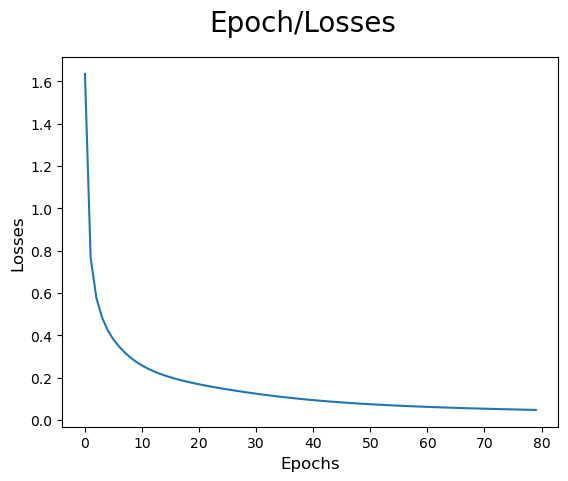

In [38]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [39]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predict(['it', 'was', 'best', 'of'])

'the'

In [40]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

0.95